In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
import joblib

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the dataset
df=pd.read_csv("loan_data.csv")

In [4]:
# First 5 records
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
# Last 5 records
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [6]:
# Shape of the dataset
df.shape

(45000, 14)

In [7]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 45000
Number of columns: 14


In [8]:
# Checking the information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
# Checking the statistical summary of the dataset
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [10]:
df.describe(include='object')

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


## Data Handling

In [11]:
# Check for missing value in each column
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [12]:
# Missing values percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

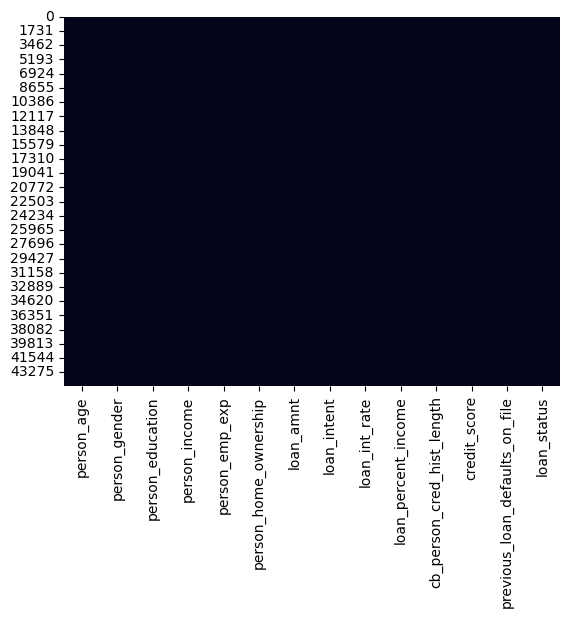

In [13]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

The dataset contained no missing values, so no imputation was required.

In [14]:
# Checking duplicate records
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [15]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [16]:
# Get the name of all columns
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [17]:
# Separating categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print()
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


## Data Exploration and Visualization

In [18]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


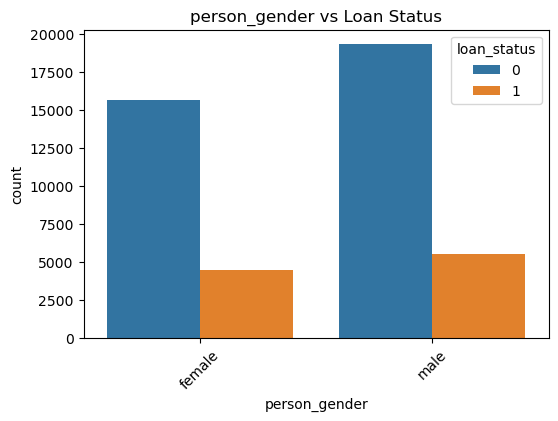

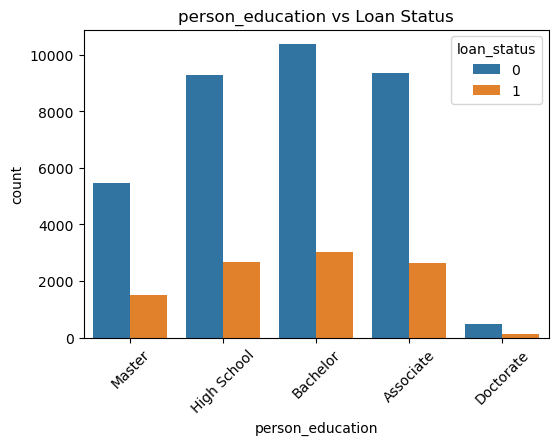

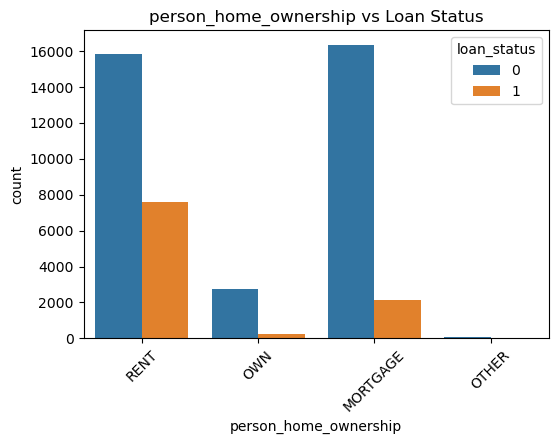

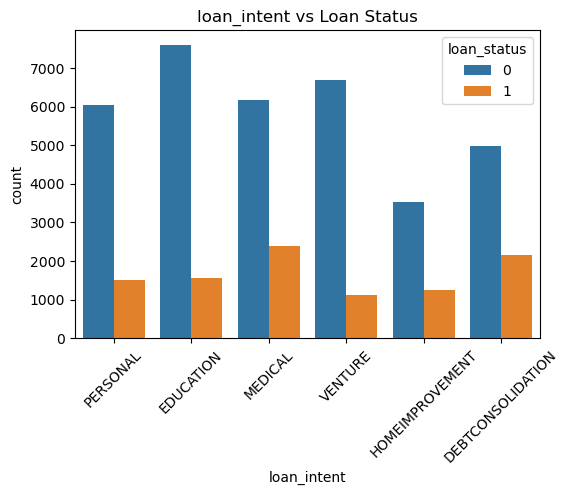

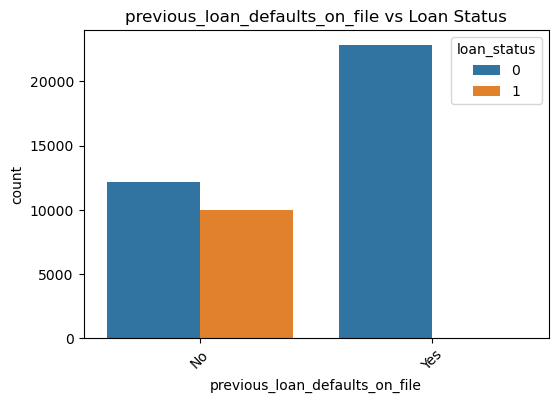

In [19]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f"{col} vs Loan Status")
    plt.xticks(rotation=45)
    plt.show()

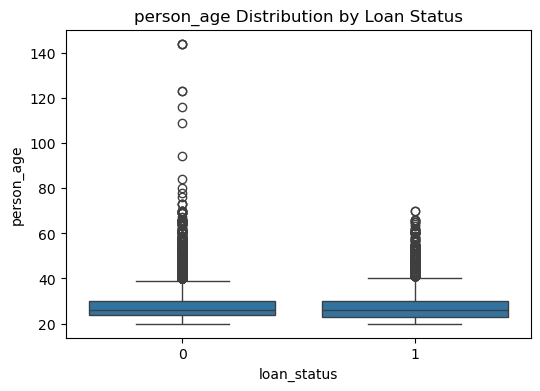

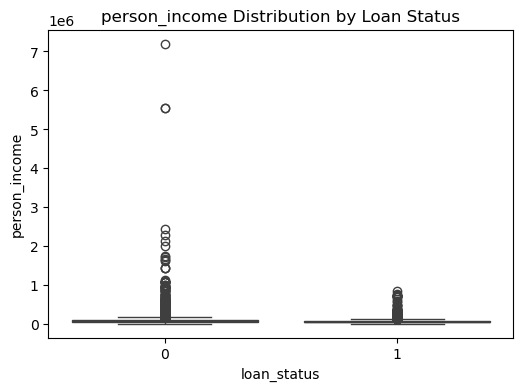

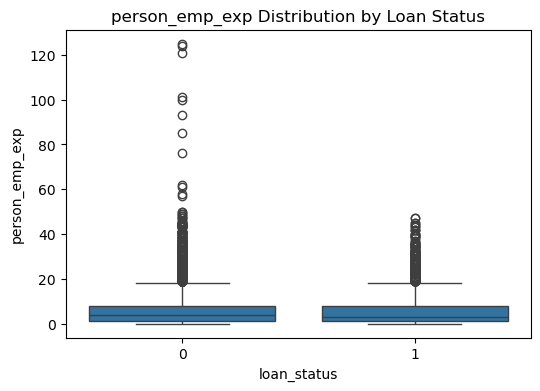

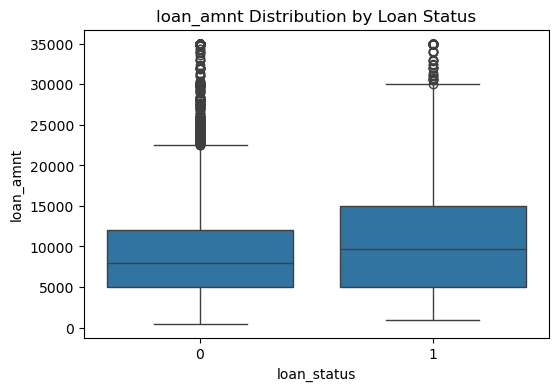

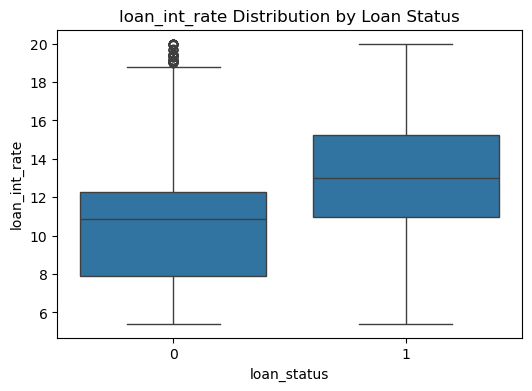

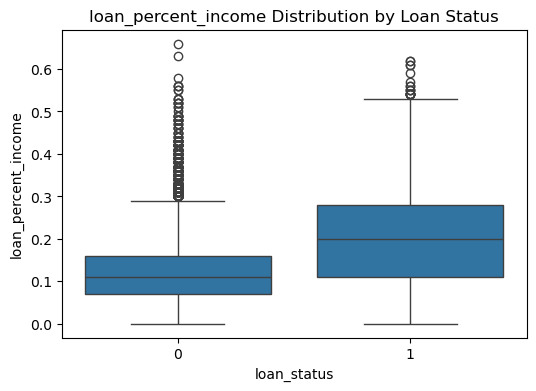

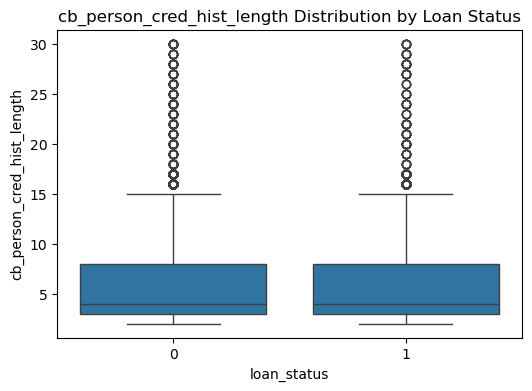

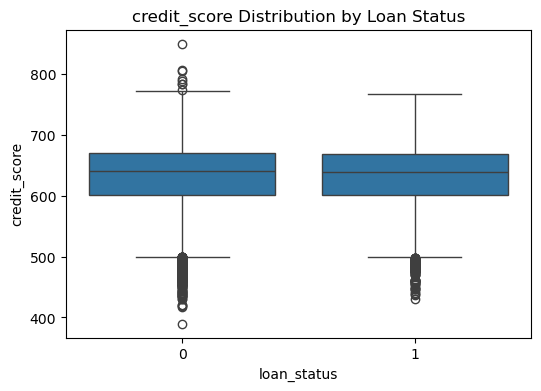

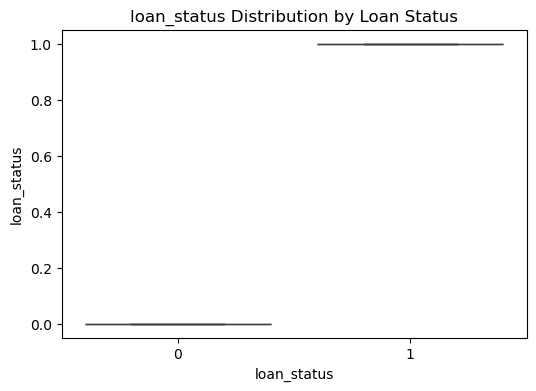

In [20]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f"{col} Distribution by Loan Status")
    plt.show()

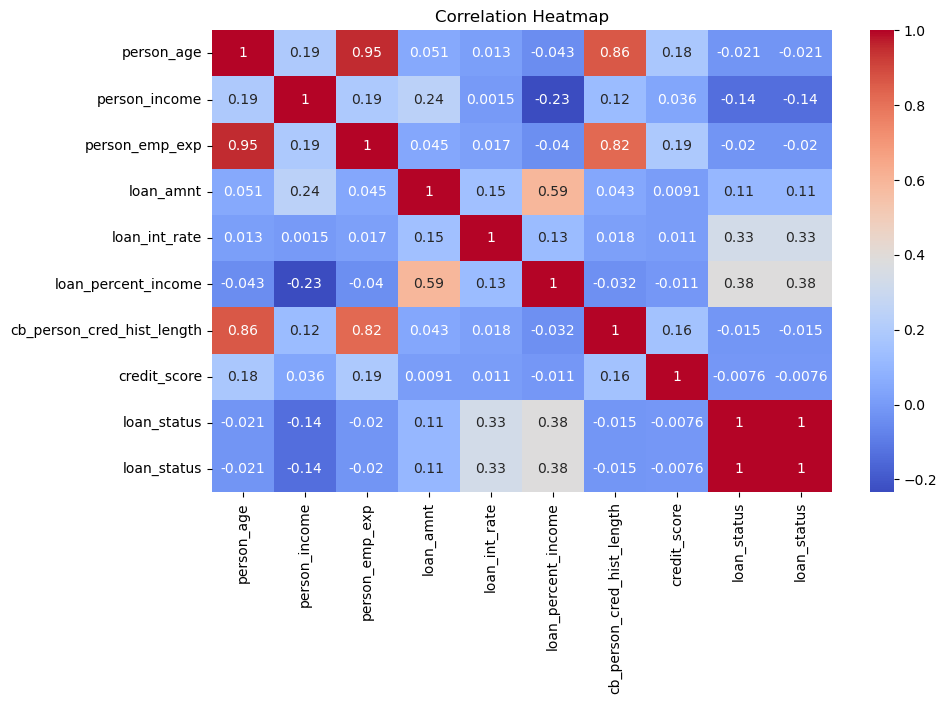

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols + ['loan_status']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

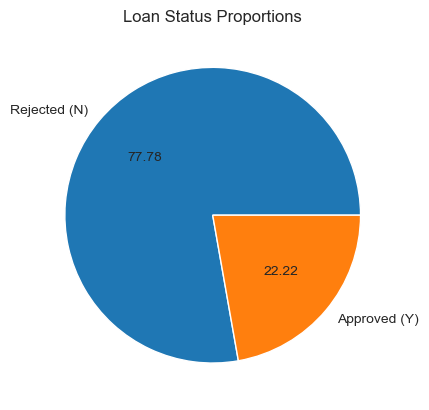

In [22]:
label_prop = df['loan_status'].value_counts()

sns.set_style('whitegrid')
plt.pie(label_prop.values, labels=['Rejected (N)', 'Approved (Y)'], autopct='%.2f')
plt.title('Loan Status Proportions')
plt.show()

## Encoding The Categorical Variables

In [23]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [24]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [25]:
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [26]:
df['person_gender'] = df['person_gender'].map(lambda x: 1 if x == 'male' else 0)

In [27]:
df.head(2)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0


In [28]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [29]:
educations = {
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate': 4
}

df['person_education'] = df['person_education'].map(lambda x: educations.get(x))

In [30]:
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,0,0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,0,0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


In [31]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [32]:
# One-Hot Encoding for nominal feature 'person_home_ownership'
df=pd.get_dummies(df, columns=['person_home_ownership'], prefix='home', drop_first=True, dtype=int)

In [33]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,home_OTHER,home_OWN,home_RENT
0,22.0,0,3,71948.0,0,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,0,0,1
1,21.0,0,0,12282.0,0,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0,1,0
2,25.0,0,0,12438.0,3,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0,0,0
3,23.0,0,2,79753.0,0,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,0,0,1
4,24.0,1,3,66135.0,1,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,0,0,1


In [34]:
print(df[['home_OTHER', 'home_OWN', 'home_RENT']].head())

   home_OTHER  home_OWN  home_RENT
0           0         0          1
1           0         1          0
2           0         0          0
3           0         0          1
4           0         0          1


In [35]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [36]:
df = pd.get_dummies(df, columns=['loan_intent'], prefix='purpose', drop_first=True, dtype=int)

In [37]:
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,home_OTHER,home_OWN,home_RENT,purpose_EDUCATION,purpose_HOMEIMPROVEMENT,purpose_MEDICAL,purpose_PERSONAL,purpose_VENTURE
0,22.0,0,3,71948.0,0,35000.0,16.02,0.49,3.0,561,No,1,0,0,1,0,0,0,1,0
1,21.0,0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,Yes,0,0,1,0,1,0,0,0,0
2,25.0,0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,No,1,0,0,0,0,0,1,0,0


In [38]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(lambda x: 1 if x == 'Yes' else 0)

In [40]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,home_OTHER,home_OWN,home_RENT,purpose_EDUCATION,purpose_HOMEIMPROVEMENT,purpose_MEDICAL,purpose_PERSONAL,purpose_VENTURE
0,22.0,0,3,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,0,0,1,0,0,0,1,0
1,21.0,0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,0,1,0,1,0,0,0,0
2,25.0,0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,0,0,0,0,0,1,0,0
3,23.0,0,2,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,0,0,1,0,0,1,0,0
4,24.0,1,3,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,0,0,1,0,0,1,0,0


## Splitting && Model Training

In [41]:
# Features (X) → all columns except target
X = df.drop('loan_status', axis=1)

# Target (y)
y = df['loan_status']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (33750, 19)
Test set shape: (11250, 19)


In [43]:
numeric_cols = [col for col in X_train.select_dtypes(include=['float64','int64']).columns if col not in ['Loan_Status']]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [45]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,home_OTHER,home_OWN,home_RENT,purpose_EDUCATION,purpose_HOMEIMPROVEMENT,purpose_MEDICAL,purpose_PERSONAL,purpose_VENTURE
0,22.0,0,3,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,0,0,1,0,0,0,1,0
1,21.0,0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,0,1,0,1,0,0,0,0
2,25.0,0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,0,0,0,0,0,1,0,0
3,23.0,0,2,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,0,0,1,0,0,1,0,0
4,24.0,1,3,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,1,47971.0,6,15000.0,15.66,0.31,3.0,645,0,1,0,0,1,0,0,1,0,0
44996,37.0,0,1,65800.0,17,9000.0,14.07,0.14,11.0,621,0,1,0,0,1,0,1,0,0,0
44997,33.0,1,1,56942.0,7,2771.0,10.02,0.05,10.0,668,0,1,0,0,1,0,0,0,0,0
44998,29.0,1,2,33164.0,4,12000.0,13.23,0.36,6.0,604,0,1,0,0,1,1,0,0,0,0


In [47]:
X_train

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,home_OTHER,home_OWN,home_RENT,purpose_EDUCATION,purpose_HOMEIMPROVEMENT,purpose_MEDICAL,purpose_PERSONAL,purpose_VENTURE
12863,-0.292319,-1.104186,-0.360823,0.259747,-0.067540,-0.571339,-0.381491,-0.916252,-0.739231,0.425196,-1.013303,0,0,0,1,0,0,0,0
12903,-0.623035,0.905645,0.568779,0.040153,-0.891830,0.378946,-0.273883,0.002655,-0.480970,-0.390552,-1.013303,0,0,1,0,0,0,0,0
8164,-0.623035,-1.104186,0.568779,-0.145981,-0.562114,1.234203,-1.689594,1.266152,-0.997492,0.723640,0.986871,0,0,0,0,0,1,0,0
5884,-0.457677,-1.104186,-0.360823,-0.130748,-0.891830,-0.650530,-0.008227,-0.686526,-0.480970,0.126751,0.986871,0,0,1,0,1,0,0,0
31522,1.526621,-1.104186,-0.360823,0.475547,1.086464,-0.001168,0.741663,-0.686526,2.876423,0.763433,-1.013303,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,-0.788393,0.905645,0.568779,0.109487,-0.397256,-0.967291,0.623967,-1.145979,-0.739231,0.027270,0.986871,0,0,1,1,0,0,0,0
43818,2.518770,-1.104186,-0.360823,-0.766320,2.735043,-0.870521,-0.058668,1.381015,1.843379,-2.002152,-1.013303,0,0,1,0,0,1,0,0
28842,0.369114,0.905645,0.568779,-0.092388,0.591891,1.645993,-1.629065,1.495878,0.810335,-3.096448,0.986871,0,1,0,1,0,0,0,0
21553,0.369114,0.905645,-0.360823,-0.483024,0.427033,-0.571339,0.664320,0.117518,0.810335,1.121566,-1.013303,0,0,1,0,0,1,0,0


In [48]:
X_test

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,home_OTHER,home_OWN,home_RENT,purpose_EDUCATION,purpose_HOMEIMPROVEMENT,purpose_MEDICAL,purpose_PERSONAL,purpose_VENTURE
2799,-0.953752,0.905645,-1.290426,-0.106231,-0.891830,0.378946,-0.216717,0.347245,-0.739231,0.524677,-1.013303,0,0,1,0,0,0,1,0
23680,0.699830,-1.104186,-0.360823,-0.025540,1.251322,0.062184,0.328046,-0.112209,-0.222709,0.484885,-1.013303,0,1,0,0,0,0,0,1
9085,-0.623035,0.905645,-1.290426,-0.086780,-0.891830,-0.729720,-1.302880,-0.801389,-0.997492,-0.509930,-1.013303,0,0,0,0,0,1,0,0
5353,-0.292319,0.905645,0.568779,-0.330950,-0.067540,-0.175387,-0.273883,0.232381,-0.997492,0.106855,0.986871,0,0,1,0,0,1,0,0
7914,-0.457677,-1.104186,-0.360823,-0.254229,-0.397256,-0.412958,-1.047312,-0.227072,-0.739231,0.146648,0.986871,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29831,2.353412,-1.104186,-0.360823,-0.373339,2.240469,-1.125672,-1.881270,-1.031116,1.585118,1.599077,0.986871,0,0,0,0,1,0,0,0
38197,0.038397,0.905645,-0.360823,0.192028,0.262175,-0.951453,-1.312968,-1.145979,0.035552,0.166544,-1.013303,0,0,1,0,0,0,0,0
3112,-0.953752,-1.104186,1.498381,-0.691249,-0.891830,-0.967291,-0.001502,0.232381,-0.480970,-0.350760,-1.013303,0,0,1,1,0,0,0,0
44129,0.369114,-1.104186,-0.360823,-0.736502,0.427033,-1.344238,0.933338,-0.916252,0.552074,1.041981,-1.013303,0,0,1,0,0,0,0,1


In [49]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# -----------------------------
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("----------------------------\n")

--- Logistic Regression ---
Accuracy: 0.9000
F1 Score: 0.7684
ROC-AUC: 0.8451
Confusion Matrix:
[[8259  491]
 [ 634 1866]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8750
           1       0.79      0.75      0.77      2500

    accuracy                           0.90     11250
   macro avg       0.86      0.85      0.85     11250
weighted avg       0.90      0.90      0.90     11250

----------------------------

--- Decision Tree ---
Accuracy: 0.8984
F1 Score: 0.7724
ROC-AUC: 0.8545
Confusion Matrix:
[[8168  582]
 [ 561 1939]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      8750
           1       0.77      0.78      0.77      2500

    accuracy                           0.90     11250
   macro avg       0.85      0.85      0.85     11250
weighted avg       0.90      0.90      0.90     11250

----------------------------

In [50]:
import joblib
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']

In [51]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [52]:
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, 'feature_columns.pkl')

['feature_columns.pkl']

In [53]:
feature_columns

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file',
 'home_OTHER',
 'home_OWN',
 'home_RENT',
 'purpose_EDUCATION',
 'purpose_HOMEIMPROVEMENT',
 'purpose_MEDICAL',
 'purpose_PERSONAL',
 'purpose_VENTURE']

In [54]:
numeric_cols

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file']